## S&P500 股價漲跌預測

#### Build a deep learning model to forecast S&P daily up/down utilizing GPU chips computational power

*Features (18) :*

- Equity: AAPL / AMZN / BRK_B / GOOG / GOOGL / JNJ / MSFT / NVDA / TSLA / UNH / XOM

- Index: SOX / USGG10YR / VIX / SPX

- Currency: JPY / XAU

- Commodity: CLA

*Source :*

1. https://www.kaggle.com/code/kanncaa1/long-short-term-memory-with-pytorch/notebook

2. https://blog.csdn.net/weixin_44457930/article/details/122639366

*Topics :*

1.	Study how to use some advanced deep learning library packages like PyTorch, TensorFlow.

2.	Build the first models of GPU version and of traditional CPU version with library default settings, and compare their computational efficiency.

3.	Improve the procedure of searching hyper-parameters to prevent underfitting/overfitting.

4.	Research on feature selection.

5.	Trading strategy based on the prediction results.

*Targets :*

- GPU vs. CPU

- Hyperparameters Optimization

- Feature Selection

- Strategy

*Future :*

- 改善最佳化方式

- 策略加停損

- weight decay

---

### 資料處理

In [728]:
import pandas as pd
import matplotlib.pyplot as plt

#### 2010-2023

In [16]:
aapl = pd.read_csv('./2010_2023/AAPL US Equity_target_modified.csv')
amzn = pd.read_csv('./2010_2023/AMZN US Equity_target_modified.csv')
brk = pd.read_csv('./2010_2023/BRK_B US Equity_target_modified.csv')
cla = pd.read_csv('./2010_2023/CLA Comdty_target_modified.csv')
goog = pd.read_csv('./2010_2023/GOOG US Equity_target_modified.csv')
googl = pd.read_csv('./2010_2023/GOOGL US Equity_target_modified.csv')
indu = pd.read_csv('./2010_2023/INDU Index_target_modified.csv')
jnj = pd.read_csv('./2010_2023/JNJ US Equity_target_modified.csv')
jpy = pd.read_csv('./2010_2023/JPY Curncy_target_modified.csv')
msft = pd.read_csv('./2010_2023/MSFT US Equity_target_modified.csv')
nvda = pd.read_csv('./2010_2023/NVDA US Equity_target_modified.csv')
tsla = pd.read_csv('./2010_2023/TSLA US Equity_target_modified.csv')
unh = pd.read_csv('./2010_2023/UNH US Equity_target_modified.csv')
xom = pd.read_csv('./2010_2023/XOM US Equity_target_modified.csv')
sox = pd.read_csv('./2010_2023/SOX Index_target_modified.csv')
usgg = pd.read_csv('./2010_2023/USGG10YR Index_target_modified.csv')
vix = pd.read_csv('./2010_2023/VIX Index_target_modified.csv')
xau = pd.read_csv('./2010_2023/XAU Curncy_target_modified.csv')
spx = pd.read_csv('./2010_2023/SPX Index_target_modified.csv')

In [328]:
mix = pd.concat([aapl, amzn, brk, goog, jnj, msft, nvda, tsla, unh, xom, sox, indu, usgg, vix, jpy, xau, cla, spx], axis=1)
mix.index = pd.to_datetime(mix.iloc[:, 0])
mix = mix.iloc[:, list(range(4, 90, 5))]
mix.columns = [i.upper() for i in r'aapl, amzn, brk, goog, jnj, msft, nvda, tsla, unh, xom, sox, indu, usgg, vix, jpy, xau, cla, spx'.split(', ')]
mix.to_csv('spx_full.csv')
train = mix[mix.index < '2022']
test = mix[mix.index >= '2022']
train.to_csv('spx_full_train.csv')
test.to_csv('spx_full_test.csv')
mix

,AAPL,AMZN,BRK,GOOG,JNJ,MSFT,NVDA,TSLA,UNH,XOM,SOX,INDU,USGG,VIX,JPY,XAU,CLA,SPX
Date,,,,,,,,,,,,,,,,,,
2010-01-04,7.643,6.695,66.220,27.847,64.68,30.950,4.6225,1.133,31.53,69.15,366.080,10583.96,3.8155,20.04,92.51,1121.28,49.55,1132.98
2010-01-05,7.656,6.735,66.540,27.847,63.93,30.960,4.6900,1.133,31.48,69.42,366.420,10572.02,3.7608,19.35,91.72,1118.05,49.55,1136.52
2010-01-06,7.535,6.613,66.200,27.847,64.45,30.770,4.7200,1.133,31.79,70.02,366.340,10573.68,3.8215,19.16,92.32,1138.25,49.55,1137.14
2010-01-07,7.521,6.500,66.459,27.847,63.99,30.452,4.6275,1.133,33.01,69.80,362.300,10606.86,3.8235,19.06,93.37,1131.75,49.55,1141.70
2010-01-08,7.571,6.676,66.440,27.847,64.21,30.660,4.6375,1.133,32.70,69.52,367.680,10618.19,3.8297,18.13,92.66,1138.23,49.55,1144.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,195.830,132.210,349.810,133.010,174.48,338.370,467.5000,266.440,502.91,104.16,3851.762,35459.29,3.9507,13.33,141.16,1959.49,80.58,4582.23
2023-07-31,196.450,133.680,351.960,133.110,167.53,335.920,467.2900,267.430,506.37,107.24,3861.631,35559.53,3.9588,13.63,142.29,1965.09,81.80,4588.96
2023-08-01,195.605,131.690,352.260,131.890,168.89,336.340,465.0700,261.070,504.74,106.62,3858.211,35630.68,4.0230,13.93,143.34,1944.29,81.37,4576.73


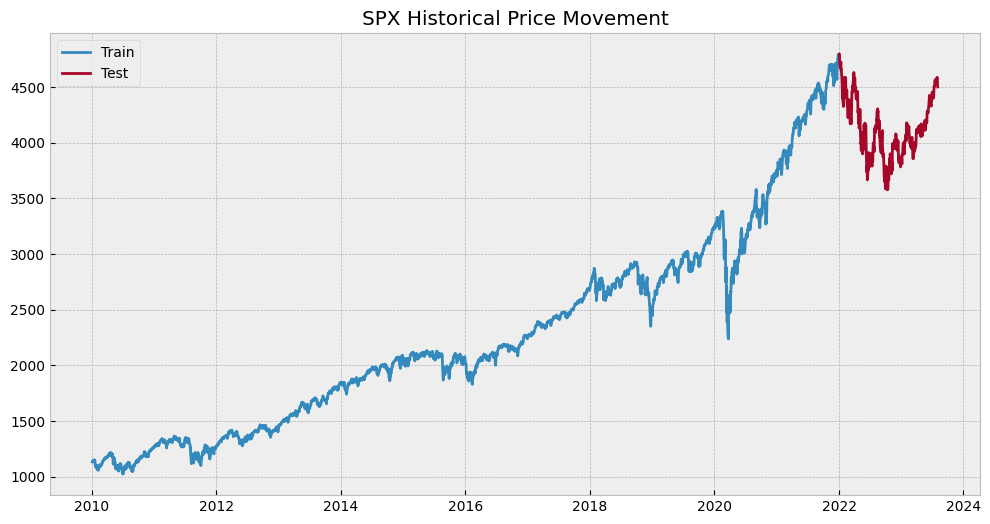

In [326]:
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.plot(train.SPX, label='Train')
plt.plot(test.SPX, label='Test')
plt.title('SPX Historical Price Movement')
plt.legend()

#### 2018-2023

In [329]:
aapl = pd.read_csv('./2018_2023/AAPL_US_Equity.csv')
amzn = pd.read_csv('./2018_2023/AMZN_US_Equity.csv')
brk = pd.read_csv('./2018_2023/BRK_B_US_Equity.csv')
goog = pd.read_csv('./2018_2023/GOOG_US_Equity.csv')
googl = pd.read_csv('./2018_2023/GOOGL_US_Equity.csv')
jnj = pd.read_csv('./2018_2023/JNJ_US_Equity.csv')
msft = pd.read_csv('./2018_2023/MSFT_US_Equity.csv')
nvda = pd.read_csv('./2018_2023/NVDA_US_Equity.csv')
tsla = pd.read_csv('./2018_2023/TSLA_US_Equity.csv')
unh = pd.read_csv('./2018_2023/UNH_US_Equity.csv')
xom = pd.read_csv('./2018_2023/XOM_US_Equity.csv')
sox = pd.read_csv('./2018_2023/SOX_Index.csv')
usgg = pd.read_csv('./2018_2023/USGG10YR_Index.csv')
vix = pd.read_csv('./2018_2023/VIX_Index.csv')
jpy = pd.read_csv('./2018_2023/JPY_Curncy.csv')
xau = pd.read_csv('./2018_2023/XAU_Curncy.csv')
cla = pd.read_csv('./2018_2023/CLA_Comdty.csv')
spx = pd.read_csv('./2018_2023/SPX_Index.csv')

In [331]:
mix = pd.concat([aapl, amzn, brk, goog, jnj, msft, nvda, tsla, unh, xom, sox, usgg, vix, jpy, xau, cla, spx], axis=1)
mix.index = pd.to_datetime(mix.iloc[:, 0])
mix = mix.iloc[:, list(range(4, 85, 5))]
mix.columns = [i.upper() for i in r'aapl, amzn, brk, goog, jnj, msft, nvda, tsla, unh, xom, sox, usgg, vix, jpy, xau, cla, spx'.split(', ')]
mix.to_csv('spx.csv')
train = mix[mix.index < '2023']
test = mix[mix.index >= '2023']
train.to_csv('spx_train.csv')
test.to_csv('spx_test.csv')
mix

,AAPL,AMZN,BRK,GOOG,JNJ,MSFT,NVDA,TSLA,UNH,XOM,SOX,USGG,VIX,JPY,XAU,CLA,SPX
Date,,,,,,,,,,,,,,,,,
2018-06-06,46.346,84.788,193.99,56.844,107.4856,96.9351,65.6822,21.300,230.102,63.3455,1437.941,2.9717,11.64,110.12,1297.63,53.78,2772.35
2018-06-07,46.221,84.465,195.57,56.193,107.9583,95.4123,65.1248,21.073,230.408,63.9784,1424.336,2.9204,12.13,109.78,1297.63,54.31,2770.37
2018-06-08,45.801,84.200,196.01,56.043,108.5973,96.1217,64.9713,21.177,231.981,64.5342,1412.287,2.9461,12.18,109.55,1298.17,54.53,2779.03
2018-06-11,45.689,84.456,195.33,56.500,107.3718,95.5731,64.5601,22.140,234.850,64.1483,1408.991,2.9516,12.35,110.01,1300.31,54.82,2782.00
2018-06-12,45.939,84.938,195.27,56.966,107.2668,95.8190,65.0456,22.851,234.665,63.6233,1416.368,2.9608,12.34,110.26,1296.64,54.63,2786.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,185.270,127.330,334.12,119.090,163.6300,328.6000,406.3200,241.050,479.060,104.2900,3515.772,3.7212,14.25,143.58,1923.79,68.71,4328.82
2023-06-27,188.060,129.180,335.34,119.010,163.2900,334.5700,418.7600,250.210,482.560,104.5500,3642.412,3.7639,13.74,143.98,1914.68,67.50,4378.41
2023-06-28,189.250,129.040,334.15,121.080,162.9600,335.8500,411.1700,256.240,474.450,105.4000,3609.482,3.7078,13.43,144.18,1912.32,67.05,4376.86


---

### LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import torch 
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tqdm import tqdm

#### Model

In [72]:
class LSTM(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)     # (batch, seq, feature)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=x.device).requires_grad_()
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=x.device).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out) 
        return out

#### Feature Selection & Normalization

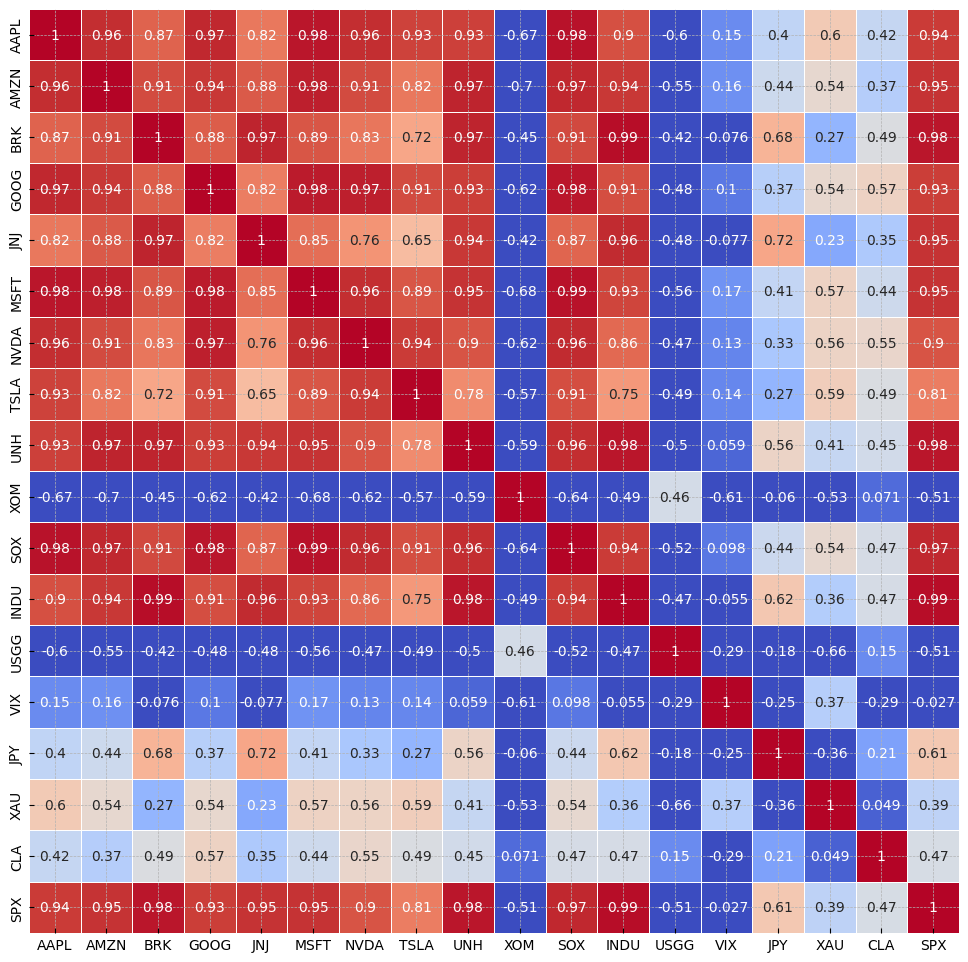

In [73]:
df = pd.read_csv('./spx_full.csv', index_col=0)
train, test = pd.read_csv('./spx_full_train.csv', index_col=0), pd.read_csv('./spx_full_test.csv', index_col=0)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.corr(), cbar=0, linewidths=0.5, vmax=1, vmin=0, annot=True, cmap='coolwarm')
plt.show()

In [74]:
# feat_idx = list(range(0, 17))
feat_idx = list(range(0, 9)) + [10, 11, 14, 17]
df, train, test = df.iloc[:, feat_idx], train.iloc[:, feat_idx], test.iloc[:, feat_idx]

scalar = MinMaxScaler(feature_range=(0, 1))
for col in df.columns:
    train[col] = scalar.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scalar.fit_transform(test[col].values.reshape(-1, 1))

train['LABEL'] = train.SPX.shift(-1).dropna()
test['LABEL'] = test.SPX.shift(-1).dropna()
train

,AAPL,AMZN,BRK,GOOG,JNJ,MSFT,NVDA,TSLA,UNH,SOX,INDU,JPY,SPX,LABEL
Date,,,,,,,,,,,,,,
2010-01-04,0.004519,0.006978,0.005441,0.026056,0.062556,0.024805,0.007245,0.000196,0.007703,0.015699,0.033485,0.335073,0.029280,0.030219
2010-01-05,0.004594,0.007199,0.006802,0.026056,0.056431,0.024836,0.007448,0.000196,0.007598,0.015790,0.033040,0.319213,0.030219,0.030383
2010-01-06,0.003897,0.006525,0.005356,0.026056,0.060678,0.024242,0.007539,0.000196,0.008247,0.015769,0.033102,0.331259,0.030383,0.031593
2010-01-07,0.003816,0.005902,0.006458,0.026056,0.056921,0.023249,0.007260,0.000196,0.010801,0.014686,0.034340,0.352339,0.031593,0.032463
2010-01-08,0.004104,0.006873,0.006377,0.026056,0.058718,0.023899,0.007290,0.000196,0.010152,0.016128,0.034763,0.338085,0.032463,0.032993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1.000000,0.906701,0.985121,0.979033,0.919967,0.997938,0.926675,0.889163,0.987273,1.000000,0.993051,0.783979,0.999504,0.998220
2021-12-28,0.994005,0.912172,0.992008,0.966222,0.925521,0.994189,0.907884,0.884703,0.994474,0.987320,0.996626,0.782975,0.998220,1.000000
2021-12-29,0.994524,0.904112,0.996982,0.966674,0.935321,0.996376,0.898202,0.882844,1.000000,0.989239,1.000000,0.785585,1.000000,0.996199


#### Hyperparameters

In [75]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

input_dim = train.shape[1] - 1
output_dim = 1

config = {
    'hidden_dim': 12,
    'layer_dim': 3,
    'seq_dim': 20, 
    'n_epochs': 1000,
    'learning_rate': 0.001,
    'early_stop': 500,
    'save_path': './best.ckpt'
} 

#### Training

In [8]:
def trainer(train, model, config, device):
    
    ### Cross Validation
    tscv = TimeSeriesSplit(n_splits=5, test_size=100)
    splits = list(tscv.split(train.values)) 
    cv_loss_record = []
    cv_best_loss = math.inf
    
    for i in tqdm(range(len(splits)), leave=True):
        train_set, valid_set = train.iloc[splits[i][0]], train.iloc[splits[i][1]]
    
        train_data = pd.DataFrame()
        for i in range(len(train_set) - config['seq_dim']):
            train_data = pd.concat([train_data, train_set.iloc[i:i+config['seq_dim']]])

        valid_data = pd.DataFrame()
        for i in range(len(valid_set) - config['seq_dim']):
            valid_data = pd.concat([valid_data, valid_set.iloc[i:i+config['seq_dim']]])
        
        train_data, valid_data = train_data.values, valid_data.values

        x_train = torch.from_numpy(train_data[:, :-1].reshape(-1, config['seq_dim'], input_dim)).type(torch.Tensor)
        x_valid = torch.from_numpy(valid_data[:, :-1].reshape(-1, config['seq_dim'], input_dim)).type(torch.Tensor)
        y_train = torch.from_numpy(train_data[:, -1].reshape(-1, config['seq_dim'], 1)).type(torch.Tensor)
        y_valid = torch.from_numpy(valid_data[:, -1].reshape(-1, config['seq_dim'], 1)).type(torch.Tensor)
        
        criterion = nn.MSELoss(reduction='mean')
        optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])

        early_stop_count = 0
        best_loss = math.inf
        for epoch in tqdm(range(config['n_epochs']), position=0, leave=True):
            
            model.train()
            loss_record = []
            optimizer.zero_grad()   
            x_train, y_train = x_train.to(device), y_train.to(device)
            y_pred = model(x_train)             
            loss = criterion(y_pred, y_train)
            loss.backward()
            optimizer.step()
            loss_record.append(loss.detach().item())
            mean_train_loss = sum(loss_record) / len(loss_record)
            
            model.eval()
            loss_record = []     
            x_valid, y_valid = x_valid.to(device), y_valid.to(device)
            with torch.no_grad():
                y_pred = model(x_valid)      
                loss = criterion(y_pred, y_valid)
            loss_record.append(loss.item())
            mean_valid_loss = sum(loss_record) / len(loss_record)
            
            if (epoch+1) % (config['n_epochs']) == 0:
                n_epochs = config['n_epochs']
                print(f'Epoch [{epoch+1}/{n_epochs}]: Train loss: {mean_train_loss:.4f}, Valid loss: {mean_valid_loss:.4f}')    

            if mean_valid_loss < best_loss:
                best_loss = mean_valid_loss
                early_stop_count = 0
                if best_loss < cv_best_loss:
                    cv_best_loss = best_loss
                    torch.save(model.state_dict(), config['save_path'])
            else: 
                early_stop_count += 1

            if early_stop_count > config['early_stop']:
                print('Model is not improving.')
                print(f'Epoch [{epoch+1}/{n_epochs}]: Train loss: {mean_train_loss:.4f}, Valid loss: {mean_valid_loss:.4f}')  
                break
            
        cv_loss_record.append(mean_valid_loss)
    
    print(f'Average Loss: {sum(cv_loss_record) / len(cv_loss_record)}')

In [9]:
model = LSTM(input_dim, config['hidden_dim'], config['layer_dim'], output_dim).to(device)
trainer(train, model, config, device)

 20%|██        | 1/5 [00:23<01:33, 23.43s/it]

Epoch [1000/1000]: Train loss: 0.0001, Valid loss: 0.0014


 40%|████      | 2/5 [00:43<01:04, 21.57s/it]

Epoch [1000/1000]: Train loss: 0.0000, Valid loss: 0.0002


 60%|██████    | 3/5 [00:54<00:32, 16.45s/it]

Model is not improving.
Epoch [510/1000]: Train loss: 0.0000, Valid loss: 0.0007


 80%|████████  | 4/5 [01:10<00:16, 16.45s/it]

Model is not improving.
Epoch [858/1000]: Train loss: 0.0000, Valid loss: 0.0008


100%|██████████| 5/5 [01:21<00:00, 16.36s/it]

Model is not improving.
Epoch [502/1000]: Train loss: 0.0001, Valid loss: 0.0009
Average Loss: 0.0007968586956849322


#### Hyperparameters Tuning

In [ ]:
for layer in [3, 4, 5, 6]:
    for hidden in [6, 12, 18, 24, 30]:
        for seq in [10, 20, 30]:
            for lr in [0.01, 0.001]:
                config['hidden_dim'] = hidden
                config['seq_dim'] = seq
                config['layer_dim'] = layer
                config['learning_rate'] = lr 
                model = LSTM(input_dim, config['hidden_dim'], config['layer_dim'], output_dim).to(device)
                loss = trainer(train, model, config, device)
                print(f'(layer: {layer}, hidden: {hidden}, seq: {seq}, lr: {lr}) -> Loss: {loss}')

#### CPU vs. GPU

In [ ]:
from timeit import default_timer as timer

gpu_list, cpu_list = [], []
device = 'cuda:0'

for i in range(100, 1001, 100):
    config['n_epochs'] = i
    model = LSTM(input_dim, config['hidden_dim'], config['layer_dim'], output_dim).to(device)   
    start = timer()
    trainer(train, model, config, device)
    gpu_list.append(timer()-start)

device = 'cpu'

for i in range(100, 1001, 100):
    config['n_epochs'] = i
    model = LSTM(input_dim, config['hidden_dim'], config['layer_dim'], output_dim).to(device)   
    start = timer()
    trainer(train, model, config, device)
    cpu_list.append(timer()-start)

Text(0.5, 1.0, 'CPU vs. GPU')

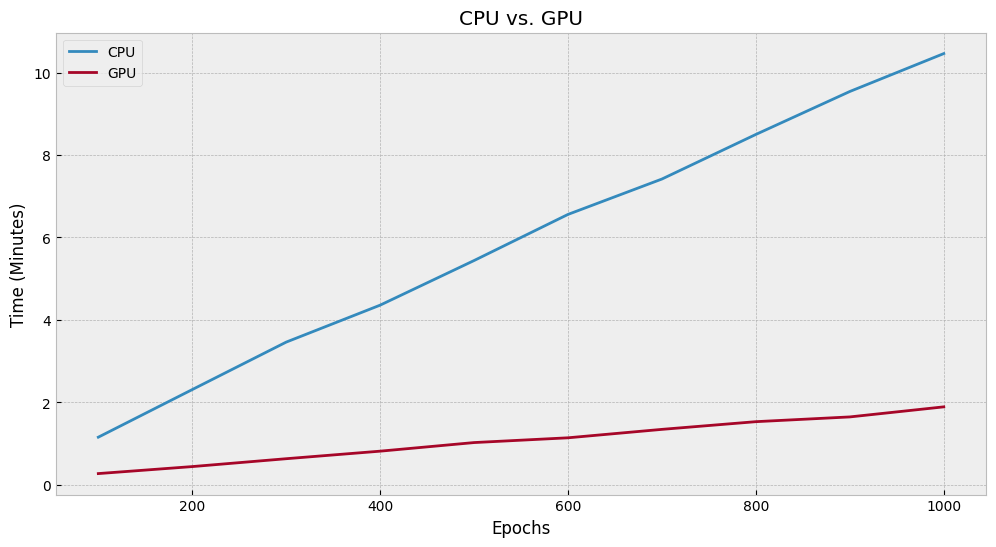

In [ ]:
cpu_list = [i / 60 for i in cpu_list]
gpu_list = [i / 60 for i in gpu_list]
cpu = pd.Series(cpu_list, index=range(100, 1001, 100))
gpu = pd.Series(gpu_list, index=range(100, 1001, 100))
plt.figure(figsize=(12, 6))
plt.xlabel('Epochs')
plt.ylabel('Time (Minutes)')
plt.plot(cpu, label='CPU')
plt.plot(gpu, label='GPU')
plt.legend()
plt.title('CPU vs. GPU')

#### Testing

In [76]:
def predict(test, model, config, device):

    test_data = pd.DataFrame()
    for i in range(len(test) - config['seq_dim']):
        test_data = pd.concat([test_data, test.iloc[i:i+config['seq_dim']]]) 
    test_data = test_data.values
    
    model.load_state_dict(torch.load('./LSTM_best.ckpt'))
    model.eval()
    x_test = torch.from_numpy(test_data[:, :-1].reshape(-1, config['seq_dim'], input_dim)).type(torch.Tensor)
    y_test = torch.from_numpy(test_data[:, -1].reshape(-1, config['seq_dim'], 1)).type(torch.Tensor)
    criterion = nn.MSELoss(reduction='mean')    
    x_test, y_test = x_test.to(device), y_test.to(device)               
    with torch.no_grad():                   
        y_pred = model(x_test)                     
        loss = criterion(y_pred, y_test)
    print(f'Test Loss: {loss.item()}')

    pred_value = y_pred.detach().cpu().numpy()[:, -1, 0]
    pred_value = scalar.inverse_transform(pred_value.reshape(-1, 1))
    pred_value = pd.Series(pred_value.squeeze(1), index=pd.to_datetime(test.index[config['seq_dim']:]))
    
    true_value = y_test.detach().cpu().numpy()[:, -1, 0]
    true_value = scalar.inverse_transform(true_value.reshape(-1, 1))
    true_value = pd.Series(true_value.squeeze(1), index=pd.to_datetime(test.index[config['seq_dim']:]))
    
    return pred_value, true_value

In [77]:
model = LSTM(input_dim, config['hidden_dim'], config['layer_dim'], output_dim).to(device)
pred_value, true_value = predict(test, model, config, device)

Test Loss: 0.005442517343908548


#### Results

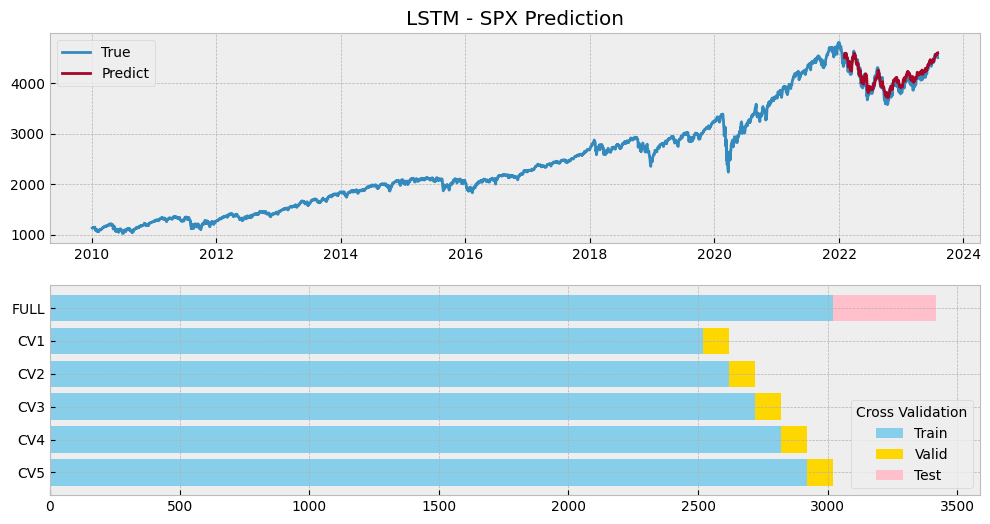

In [78]:
train_value = pd.read_csv('spx_full.csv', index_col=0)
train_value.index = pd.to_datetime(train_value.index)
# pred_value.reindex(train_value.SPX.index)

plt.style.use('bmh')
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(211)
ax1.plot(train_value.SPX, label='True')
ax1.plot(pred_value.shift(1), label='Predict')
ax1.legend(loc=2)
ax1.set_title('LSTM - SPX Prediction')

ax2 = plt.subplot(212)
label = ['CV5', 'CV4', 'CV3', 'CV2', 'CV1', 'FULL']
train_bar = [2920, 2820, 2720, 2620, 2520, 3020]
valid_bar = [100, 100, 100, 100, 100, 0]
test_bar = [0, 0, 0, 0, 0, 397]
b1 = ax2.barh(label, train_bar, color='skyblue')
b2 = ax2.barh(label, valid_bar, left=train_bar, color='gold')
b3 = ax2.barh(label, test_bar, left=train_bar, color='pink')

plt.legend([b1, b2, b3], ['Train', 'Valid', 'Test'], title='Cross Validation', loc=4)

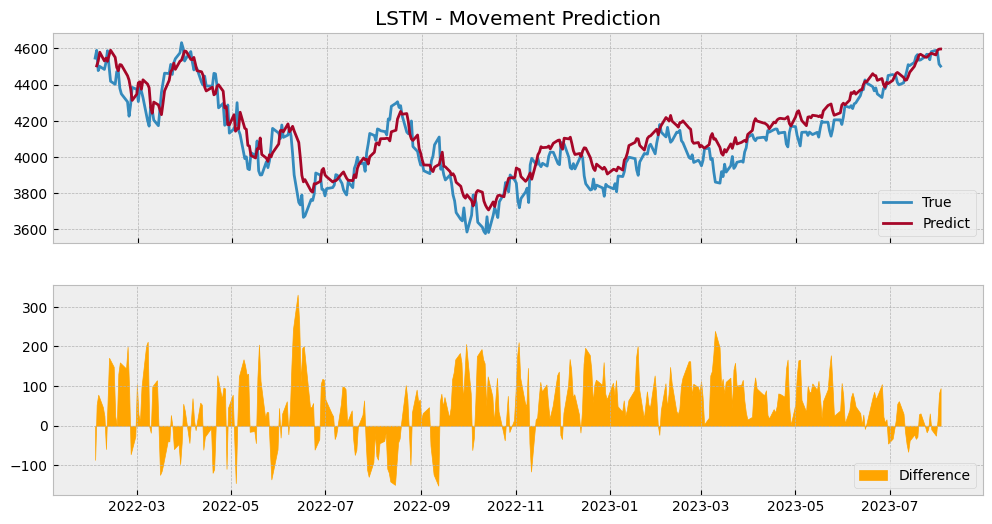

In [79]:
true_sig = (true_value > true_value.shift(1)).astype(int)
pred_sig = (pred_value > true_value).astype(int)
diff = pred_value.shift(1) - true_value

plt.style.use('bmh')
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(211)
ax1.plot(true_value, label='True')
ax1.plot(pred_value.shift(1), label='Predict')
ax1.legend(loc=4)
ax1.tick_params('x', labelbottom=False)
ax1.set_title('LSTM - Movement Prediction')

ax2 = plt.subplot(212)
# ax2.bar(true_sig.index, true_sig*-1, label='True')
# ax2.bar(pred_sig.index, pred_sig.shift(1), label='Predict')
ax2.fill_between(true_value.index, 0, diff, color='orange', label='Difference')
# ax2.bar(pred_sig.index, diff, label='Diff')
ax2.legend(loc=4)
# ax2.set_yticks([-1, 0, 1])

In [80]:
acc = (true_sig == pred_sig.shift(1)).sum() / len(true_sig)
print(f'準確率: {np.round(acc*100)}%')

準確率: 50.0%


#### Strategy

In [898]:
### 建立多空單，隔天開盤價進出場

# spx = pd.read_csv('./2010_2023/SPX Index_target_modified.csv')
# open = pd.Series(spx.Open.values, index=pd.to_datetime(spx.Date))
# open = open.reindex(pred_sig.index)
# payoff = open.diff(1) / open.shift(1)
# position = pred_sig.shift(1)
# position = position.replace(0, -1).fillna(0)
# payoff = (position.shift(1) * payoff).fillna(0)
# equity = payoff.cumsum() + 1
# spx_payoff = (open.diff(1) / open[0]).fillna(0)
# spx_equity = spx_payoff.cumsum() + 1

In [900]:
### 建立多空單，當天收盤價進出場

# spx = pd.read_csv('./2010_2023/SPX Index_target_modified.csv')
# close = pd.Series(spx.Close.values, index=pd.to_datetime(spx.Date))
# close = close.reindex(pred_sig.index)
# payoff = close.diff(1) / close.shift(1)
# position = pred_sig
# position = position.replace(0, -1).fillna(0)
# payoff = (position.shift(1) * payoff).fillna(0)
# equity = payoff.cumsum() + 1
# spx_payoff = (close.diff(1) / close[0]).fillna(0)
# spx_equity = spx_payoff.cumsum() + 1

In [36]:
### 建立多空單，預測隔日收盤價與當日收盤價差價過大則在收盤做進出場

threshold = 0.03
percentage = (pred_value - true_value) / true_value
signal = (percentage > threshold).astype(int) + (percentage < -threshold).astype(int) * -1

spx = pd.read_csv('./2010_2023/SPX Index_target_modified.csv')
close = pd.Series(spx.Close.values, index=pd.to_datetime(spx.Date))
close = close.reindex(signal.index)
payoff = close.diff(1) / close.shift(1)
position = signal
payoff = (position.shift(1) * payoff).fillna(0)
equity = payoff.cumsum() + 1
spx_payoff = (close.diff(1) / close[0]).fillna(0)
spx_equity = spx_payoff.cumsum() + 1

Text(0.5, 1.0, 'Threshold Optimization')

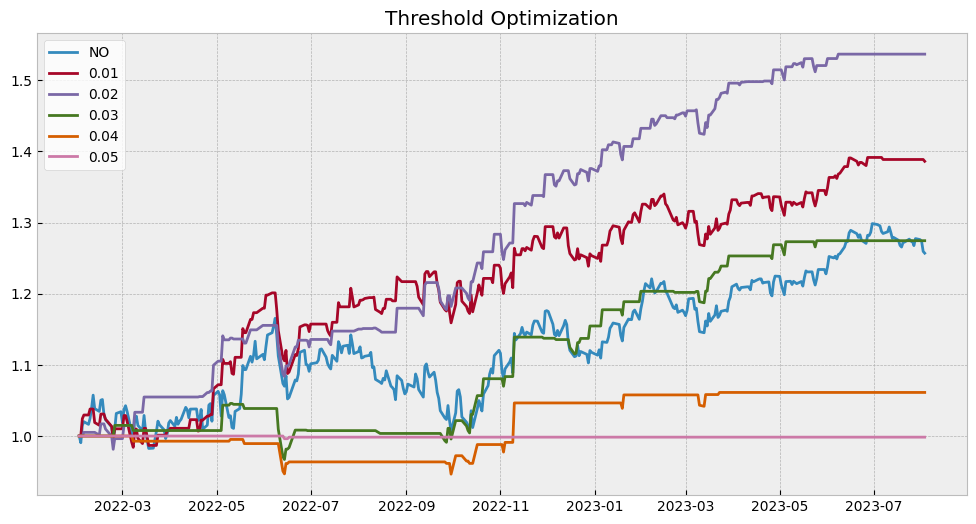

In [40]:
threshold = 0
percentage = (pred_value - true_value) / true_value
signal = (percentage > threshold).astype(int) + (percentage < -threshold).astype(int) * -1
spx = pd.read_csv('./2010_2023/SPX Index_target_modified.csv')
close = pd.Series(spx.Close.values, index=pd.to_datetime(spx.Date))
close = close.reindex(signal.index)
position = signal
payoff = close.diff(1) / close.shift(1)
payoff = (position.shift(1) * payoff).fillna(0)
equity = payoff.cumsum() + 1
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.plot(equity, label='NO')

threshold = [0.01, 0.02, 0.03, 0.04, 0.05]

for t in threshold:
    percentage = (pred_value - true_value) / true_value
    signal = (percentage > t).astype(int) + (percentage < -t).astype(int) * -1
    position = signal
    payoff = close.diff(1) / close.shift(1)
    payoff = (position.shift(1) * payoff).fillna(0)
    equity = payoff.cumsum() + 1
    plt.plot(equity, label=str(t))
    
plt.legend(loc=2, frameon=True, facecolor='w')
plt.title('Threshold Optimization')

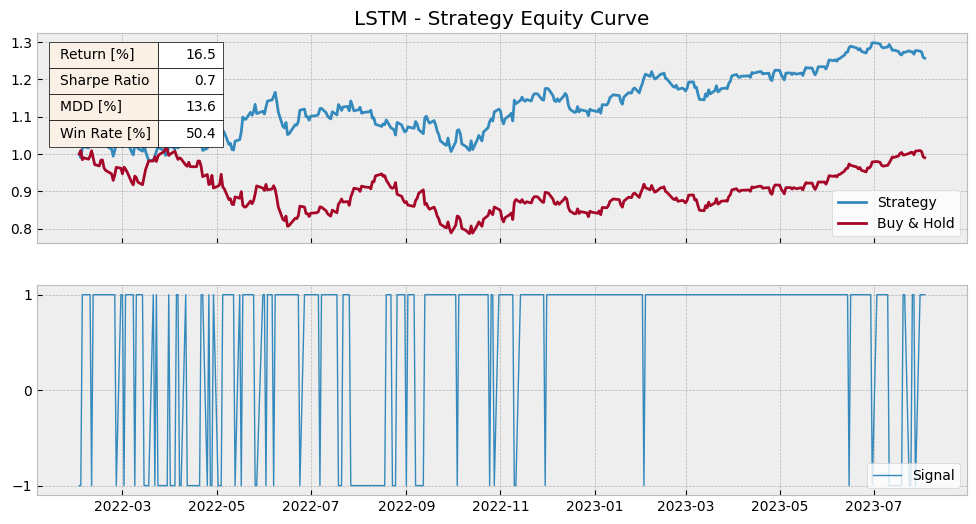

In [117]:
threshold = 0
percentage = (pred_value - true_value) / true_value
signal = (percentage > threshold).astype(int) + (percentage < -threshold).astype(int) * -1

spx = pd.read_csv('./2010_2023/SPX Index_target_modified.csv')
close = pd.Series(spx.Close.values, index=pd.to_datetime(spx.Date))
close = close.reindex(signal.index)
payoff = close.diff(1) / close.shift(1)
position = signal
payoff = (position.shift(1) * payoff).fillna(0)
equity = payoff.cumsum() + 1
spx_payoff = (close.diff(1) / close[0]).fillna(0)
spx_equity = spx_payoff.cumsum() + 1
    
period = len(payoff.index)
totalRet = equity[-1] - 1
ret = (1+totalRet)**(252/period) - 1 if totalRet > -1 else -((1-totalRet)**(252/period) - 1)
vol = payoff.std() * np.sqrt(252)
mdd = abs((equity / equity.cummax() - 1).min())
winRate = len([i for i in payoff if i > 0]) / len([i for i in payoff if i != 0])
sharpe = (payoff.mean() * 252 - 0.015) / vol

plt.style.use('bmh')
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(211)
ax1.plot(equity, label='Strategy')
ax1.plot(spx_equity, label='Buy & Hold')
ax1.legend(loc=4, frameon=True, facecolor='w')
ax1.set_title('LSTM - Strategy Equity Curve')
ax1.tick_params('x', labelbottom=False)
ax1.table(
    cellText=[[np.round(ret*100, 1)], [np.round(sharpe, 1)], [np.round(mdd*100, 1)], [np.round(winRate*100, 1)]], 
    rowLabels=['Return [%]', 'Sharpe Ratio', 'MDD [%]', 'Win Rate [%]'], 
    rowColours=np.full(4, 'linen'),
    loc='center',
    bbox=[0.13, 0.46, 0.07, 0.5],
    zorder=2
)
ax2 = plt.subplot(212)
ax2.plot(signal, label='Signal', lw=1)
ax2.legend(loc=4, frameon=True, facecolor='w')
ax2.set_yticks([-1, 0, 1])

---

### GAF-CNN 漲/跌/平盤

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import torch 
import torch.nn as nn
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from pyts.image import GramianAngularField
from sklearn.model_selection import TimeSeriesSplit
from tqdm.auto import tqdm

In [32]:
df = pd.read_csv('./spx_full.csv', index_col=0)
train, test = pd.read_csv('./spx_full_train.csv', index_col=0), pd.read_csv('./spx_full_test.csv', index_col=0)

# feat_idx = list(range(12, 18))
# df, train, test = df.iloc[:, feat_idx], train.iloc[:, feat_idx], test.iloc[:, feat_idx]

train['LABEL'] = (((train.SPX.diff(1) / train.SPX.shift(1)) > 0.005).astype(int) * 2 + ((train.SPX.diff(1) / train.SPX.shift(1)) < -0.005).astype(int))
test['LABEL'] = (((test.SPX.diff(1) / test.SPX.shift(1)) > 0.005).astype(int) * 2 + ((test.SPX.diff(1) / test.SPX.shift(1)) < -0.005).astype(int))

,AAPL,AMZN,BRK,GOOG,JNJ,MSFT,NVDA,TSLA,UNH,XOM,SOX,INDU,USGG,VIX,JPY,XAU,CLA,SPX,LABEL
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643,6.695,66.220,27.847,64.68,30.950,4.6225,1.133,31.53,69.15,366.080,10583.96,3.8155,20.04,92.51,1121.28,49.55,1132.98,1
2010-01-05,7.656,6.735,66.540,27.847,63.93,30.960,4.6900,1.133,31.48,69.42,366.420,10572.02,3.7608,19.35,91.72,1118.05,49.55,1136.52,1
2010-01-06,7.535,6.613,66.200,27.847,64.45,30.770,4.7200,1.133,31.79,70.02,366.340,10573.68,3.8215,19.16,92.32,1138.25,49.55,1137.14,1
2010-01-07,7.521,6.500,66.459,27.847,63.99,30.452,4.6275,1.133,33.01,69.80,362.300,10606.86,3.8235,19.06,93.37,1131.75,49.55,1141.70,1
2010-01-08,7.571,6.676,66.440,27.847,64.21,30.660,4.6375,1.133,32.70,69.52,367.680,10618.19,3.8297,18.13,92.66,1138.23,49.55,1144.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.330,169.670,296.670,148.064,169.67,342.450,309.4500,364.647,499.50,61.89,4039.512,36302.38,1.4756,17.68,114.87,1812.13,66.26,4791.19,0
2021-12-28,179.290,170.661,298.290,146.448,170.35,341.250,303.2200,362.823,502.94,61.69,3992.190,36398.21,1.4807,17.54,114.82,1806.18,66.42,4786.35,1
2021-12-29,179.380,169.201,299.460,146.505,171.55,341.950,300.0100,362.063,505.58,61.15,3999.351,36488.63,1.5496,16.95,114.95,1804.71,67.03,4793.06,0


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

windows = 10
input_dim = train.shape[1] - 1

scalar = MinMaxScaler(feature_range=(0, 1))
for col in df.columns:
    train[col] = scalar.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scalar.fit_transform(test[col].values.reshape(-1, 1))

train_data = np.empty((0, train.shape[1]))
for i in range(len(train) - windows):
    train_data = np.concatenate((train_data, train.values[i:i+windows]))
    
test_data = np.empty((0, test.shape[1]))
for i in range(len(test) - windows):
    test_data = np.concatenate((test_data, test.values[i:i+windows]))

x_train = torch.from_numpy(train_data[:, :-1].reshape(-1, windows, input_dim)).type(torch.Tensor)
y_train = torch.from_numpy(train_data[:, -1].reshape(-1, windows, 1)).type(torch.Tensor)
x_test = torch.from_numpy(test_data[:, :-1].reshape(-1, windows, input_dim)).type(torch.Tensor)
y_test = torch.from_numpy(test_data[:, -1].reshape(-1, windows, 1)).type(torch.Tensor)

In [26]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)
        # input 維度 [18, 30, 30]
        self.cnn = nn.Sequential(
            nn.Conv2d(input_dim, 32, 3, 1, 1),     # [32, 30, 30]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, 1, 1),     # [64, 30, 30]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, 1, 1),     # [64, 30, 30]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            # nn.MaxPool2d(2, 2, 0),          # [64, 15, 15]
        )
        self.fc = nn.Sequential(
            nn.Linear(128*windows*windows, 1024),
            nn.ReLU(),
            # nn.Dropout(0.25),
            nn.Linear(512, 64),
            nn.ReLU(),
            # nn.Dropout(0.5),
            nn.Linear(64, 3)
        )

    def forward(self, x):
        out = self.cnn(x)
        out = out.view(out.size()[0], -1)
        return self.fc(out)
    
def trainer(images, labels, model, device):

    images = images.to(torch.float32)
    labels = labels.to(torch.float32)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-5)
        
    for epoch in tqdm(range(n_epochs), position=0, leave=True):

        # ---------- Training ----------  
        model.train()
        train_loss = []
        train_accs = []
        optimizer.zero_grad()
        images, labels = images.to(device), labels.to(device)
        logit = model(images)
        label = labels.to(torch.long).squeeze(1)
        loss = criterion(logit, label)
        loss.backward()
        optimizer.step()
        acc = (logit.argmax(dim=-1) == label.to(device)).float().mean()        
        train_loss.append(loss.item())
        train_accs.append(acc)
            
        mean_train_loss = sum(train_loss) / len(train_loss)
        mean_train_acc = sum(train_accs) / len(train_accs)

        # print(f'Train | Epoch [{epoch+1:03d}/{n_epochs:03d}]: Loss: {mean_train_loss:.5f}, Accuracy: {mean_train_acc:.5f}')    

        # ---------- Validation ----------
        torch.save(model.state_dict(), f"best.ckpt")


def predict(images, labels, model, device):
    images = images.to(torch.float32)
    labels = labels.to(torch.float32)
    model.load_state_dict(torch.load(f"best.ckpt"))
    model.eval()
    prediction = []
    images, labels = images.to(device), labels.to(device)
    with torch.no_grad():
        preds = model(images)
        label = labels.to(torch.long).squeeze(1)          
        acc = (preds.argmax(dim=-1) == label.to(device)).float().mean()
        test_label = np.argmax(preds.cpu().data.numpy(), axis=1)
        prediction += test_label.squeeze().tolist()
    print(f'Test Accuracy: {acc}')  
    return acc, prediction

In [ ]:
### GASF

full_pictorch = torch.empty((0, input_dim, windows, windows))

for i in tqdm(range(x_train.shape[0]), position=0, leave=True):
    pictorch = torch.empty((0, windows, windows))
    for j in tqdm(range(input_dim), leave=False):
        data = x_train[i][:, j]
        gasf = GramianAngularField(image_size=windows, method='summation').fit_transform(data.numpy().reshape(1, -1))
        gasf = torch.from_numpy(gasf)
        pictorch = torch.cat([pictorch, gasf], dim=0)
    pictorch = pictorch.unsqueeze(0)
    full_pictorch = torch.cat([full_pictorch, pictorch], dim=0)

x_train_gasf = full_pictorch
y_train_gasf = y_train[:, -1, :]

full_pictorch = torch.empty((0, input_dim, windows, windows))

for i in tqdm(range(x_test.shape[0]), position=0, leave=True):
    pictorch = torch.empty((0, windows, windows))
    for j in tqdm(range(input_dim), leave=False):
        data = x_test[i][:, j]
        gasf = GramianAngularField(image_size=windows, method='summation').fit_transform(data.numpy().reshape(1, -1))
        gasf = torch.from_numpy(gasf)
        pictorch = torch.cat([pictorch, gasf], dim=0)
    pictorch = pictorch.unsqueeze(0)
    full_pictorch = torch.cat([full_pictorch, pictorch], dim=0)

x_test_gasf = full_pictorch
y_test_gasf = y_test[:, -1, :]

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(12, 6))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 6), axes_pad=0.3, share_all=True, cbar_mode='single')

for i, ax in enumerate(grid):
    im = ax.imshow(full_pictorch[0, i], origin='lower', vmin=-1., vmax=1.)
    
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
fig.suptitle("5-day GASF", y=1)
plt.show()

n_epochs = 150
batch_size = 50

x_train = x_train_gasf
y_train = y_train_gasf

model = Classifier().to(device)
trainer(x_train, y_train, model, device)

In [ ]:
### GADF

full_pictorch = torch.empty((0, input_dim, windows, windows))

for i in tqdm(range(x_train.shape[0]), position=0, leave=True):
    pictorch = torch.empty((0, windows, windows))
    for j in tqdm(range(input_dim), leave=False):
        data = x_train[i][:, j]
        gadf = GramianAngularField(image_size=windows, method='difference').fit_transform(data.numpy().reshape(1, -1))
        gadf = torch.from_numpy(gadf)
        pictorch = torch.cat([pictorch, gadf], dim=0)
    pictorch = pictorch.unsqueeze(0)
    full_pictorch = torch.cat([full_pictorch, pictorch], dim=0)

x_train_gadf = full_pictorch
y_train_gadf = y_train[:, -1, :]

full_pictorch = torch.empty((0, input_dim, windows, windows))

for i in tqdm(range(x_test.shape[0]), position=0, leave=True):
    pictorch = torch.empty((0, windows, windows))
    for j in tqdm(range(input_dim), leave=False):
        data = x_test[i][:, j]
        gadf = GramianAngularField(image_size=windows, method='difference').fit_transform(data.numpy().reshape(1, -1))
        gadf = torch.from_numpy(gadf)
        pictorch = torch.cat([pictorch, gadf], dim=0)
    pictorch = pictorch.unsqueeze(0)
    full_pictorch = torch.cat([full_pictorch, pictorch], dim=0)

x_test_gadf = full_pictorch
y_test_gadf = y_test[:, -1, :]

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(12, 6))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 6), axes_pad=0.3, share_all=True, cbar_mode='single')

for i, ax in enumerate(grid):
    im = ax.imshow(full_pictorch[0, i], origin='lower', vmin=-1., vmax=1.)
    
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
fig.suptitle("5-day GADF", y=1)
plt.show()

n_epochs = 100
batch_size = 50

x_train = x_train_gadf
y_train = y_train_gadf

model = Classifier().to(device)
trainer(x_train, y_train, model, device)

In [29]:
x_test = x_test_gasf
y_test = y_test_gasf
# x_test = x_test_gadf
# y_test = y_test_gadf

model = Classifier().to(device)
acc, prediction = predict(x_test, y_test, model, device)

Test Accuracy: 0.5412371158599854


In [30]:
pred_sig = pd.Series(prediction, index=test.index[windows:])
true_sig = test.LABEL[windows:]
test_acc = (pred_sig == true_sig).sum() / len(pred_sig)
print(test_acc)

from sklearn.metrics import confusion_matrix

confusion_matrix(true_sig, pred_sig, labels=[2, 1, 0])

0.31958762886597936


array([[33, 29, 65],
       [37, 32, 61],
       [42, 30, 59]], dtype=int64)

### GAF-CNN 漲/跌

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import torch 
import torch.nn as nn
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from pyts.image import GramianAngularField
from sklearn.model_selection import TimeSeriesSplit
from tqdm.auto import tqdm

In [37]:
# mix = pd.read_csv('spx_full.csv')
# mix = mix.set_index('Date', drop=True)
# train = mix[mix.index < '2023']
# test = mix[mix.index >= '2023']

#### Feature Selection

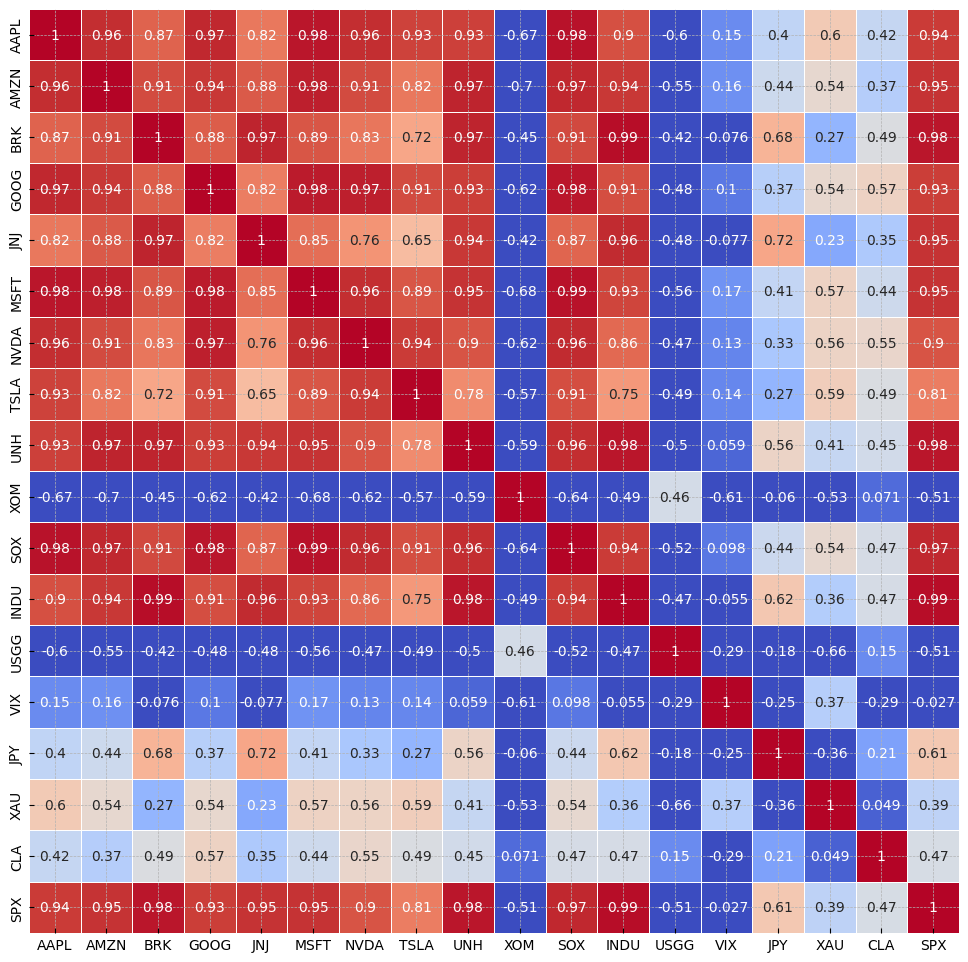

In [86]:
df = pd.read_csv('./spx_full.csv', index_col=0)
train, test = pd.read_csv('./spx_full_train.csv', index_col=0), pd.read_csv('./spx_full_test.csv', index_col=0)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.corr(), cbar=0, linewidths=0.5, vmax=1, vmin=0, annot=True, cmap='coolwarm')
plt.show()

In [87]:
df = pd.read_csv('./spx_full.csv', index_col=0)
train, test = pd.read_csv('./spx_full_train.csv', index_col=0), pd.read_csv('./spx_full_test.csv', index_col=0)

# feat_idx = list(range(12, 18))
# df, train, test = df.iloc[:, feat_idx], train.iloc[:, feat_idx], test.iloc[:, feat_idx]

train['LABEL'] = (train.SPX.shift(-1) > train.SPX).astype(int)
test['LABEL'] = (test.SPX.shift(-1) > test.SPX).astype(int)

#### Data Processing & Normalization

In [88]:
device = "cuda" if torch.cuda.is_available() else "cpu"

windows = 5
input_dim = train.shape[1] - 1

In [89]:
scalar = MinMaxScaler(feature_range=(0, 1))
for col in df.columns:
    train[col] = scalar.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scalar.fit_transform(test[col].values.reshape(-1, 1))

train_data = np.empty((0, train.shape[1]))
for i in range(len(train) - windows):
    train_data = np.concatenate((train_data, train.values[i:i+windows]))
    
test_data = np.empty((0, test.shape[1]))
for i in range(len(test) - windows):
    test_data = np.concatenate((test_data, test.values[i:i+windows]))

x_train = torch.from_numpy(train_data[:, :-1].reshape(-1, windows, input_dim)).type(torch.Tensor)
y_train = torch.from_numpy(train_data[:, -1].reshape(-1, windows, 1)).type(torch.Tensor)
x_test = torch.from_numpy(test_data[:, :-1].reshape(-1, windows, input_dim)).type(torch.Tensor)
y_test = torch.from_numpy(test_data[:, -1].reshape(-1, windows, 1)).type(torch.Tensor)

#### Model and Functions

In [102]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)
        # input 維度 [18, 30, 30]
        self.cnn = nn.Sequential(
            nn.Conv2d(input_dim, 32, 3, 1, 1),     # [32, 30, 30]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, 1, 1),     # [64, 30, 30]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, 1, 1),     # [64, 30, 30]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            # nn.MaxPool2d(2, 2, 0),          # [64, 15, 15]
        )
        self.fc = nn.Sequential(
            nn.Linear(128*windows*windows, 512),
            nn.ReLU(),
            # nn.Dropout(0.25),
            nn.Linear(512, 64),
            nn.ReLU(),
            # nn.Dropout(0.5),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        out = self.cnn(x)
        out = out.view(out.size()[0], -1)
        return self.fc(out)
    
def trainer(images, labels, model, device):

    images = images.to(torch.float32)
    labels = labels.to(torch.float32)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-5)
        
    for epoch in tqdm(range(n_epochs), position=0, leave=True):

        # ---------- Training ----------  
        model.train()
        train_loss = []
        train_accs = []
        optimizer.zero_grad()
        images, labels = images.to(device), labels.to(device)
        logit = model(images)
        label = labels.to(torch.long).squeeze(1)
        loss = criterion(logit, label)
        loss.backward()
        optimizer.step()
        acc = (logit.argmax(dim=-1) == label.to(device)).float().mean()        
        train_loss.append(loss.item())
        train_accs.append(acc)
            
        mean_train_loss = sum(train_loss) / len(train_loss)
        mean_train_acc = sum(train_accs) / len(train_accs)

        print(f'Train | Epoch [{epoch+1:03d}/{n_epochs:03d}]: Loss: {mean_train_loss:.5f}, Accuracy: {mean_train_acc:.5f}')    

        # ---------- Validation ----------
        torch.save(model.state_dict(), f"best.ckpt")


def predict(images, labels, model, device):
    images = images.to(torch.float32)
    labels = labels.to(torch.float32)
    model.load_state_dict(torch.load(f"GASF_best.ckpt"))
    model.eval()
    prediction = []
    images, labels = images.to(device), labels.to(device)
    with torch.no_grad():
        preds = model(images)
        label = labels.to(torch.long).squeeze(1)          
        acc = (preds.argmax(dim=-1) == label.to(device)).float().mean()
        test_label = np.argmax(preds.cpu().data.numpy(), axis=1)
        prediction += test_label.squeeze().tolist()
    print(f'Test Accuracy: {acc}')  
    return acc, prediction

#### GASF Graph Generation

100%|██████████| 393/393 [00:06<00:00, 57.63it/s]


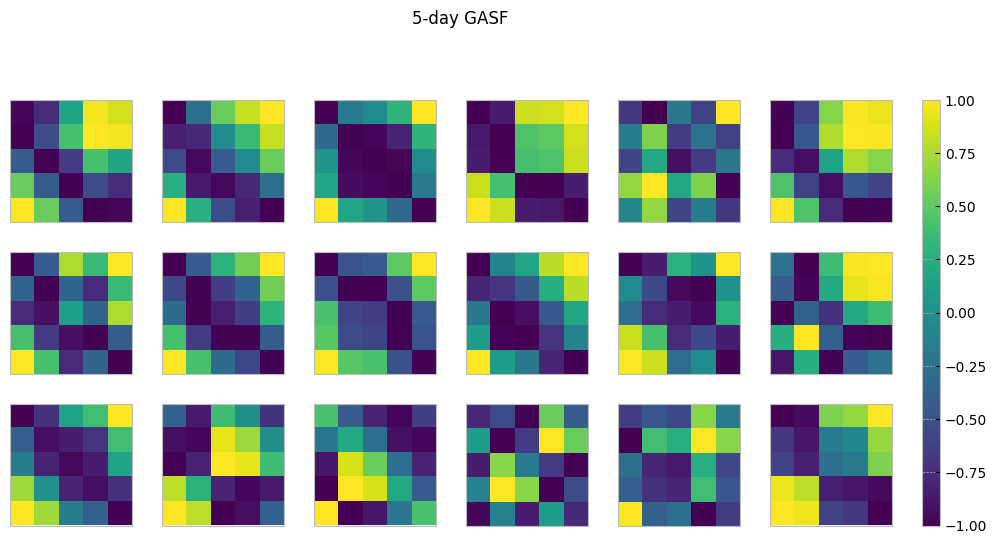

In [91]:
full_pictorch = torch.empty((0, input_dim, windows, windows))

for i in tqdm(range(x_train.shape[0]), position=0, leave=True):
    pictorch = torch.empty((0, windows, windows))
    for j in tqdm(range(input_dim), leave=False):
        data = x_train[i][:, j]
        gasf = GramianAngularField(image_size=windows, method='summation').fit_transform(data.numpy().reshape(1, -1))
        gasf = torch.from_numpy(gasf)
        pictorch = torch.cat([pictorch, gasf], dim=0)
    pictorch = pictorch.unsqueeze(0)
    full_pictorch = torch.cat([full_pictorch, pictorch], dim=0)

x_train_gasf = full_pictorch
y_train_gasf = y_train[:, -1, :]

full_pictorch = torch.empty((0, input_dim, windows, windows))

for i in tqdm(range(x_test.shape[0]), position=0, leave=True):
    pictorch = torch.empty((0, windows, windows))
    for j in tqdm(range(input_dim), leave=False):
        data = x_test[i][:, j]
        gasf = GramianAngularField(image_size=windows, method='summation').fit_transform(data.numpy().reshape(1, -1))
        gasf = torch.from_numpy(gasf)
        pictorch = torch.cat([pictorch, gasf], dim=0)
    pictorch = pictorch.unsqueeze(0)
    full_pictorch = torch.cat([full_pictorch, pictorch], dim=0)

x_test_gasf = full_pictorch
y_test_gasf = y_test[:, -1, :]

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(12, 6))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 6), axes_pad=0.3, share_all=True, cbar_mode='single')

for i, ax in enumerate(grid):
    im = ax.imshow(full_pictorch[0, i], origin='lower', vmin=-1., vmax=1.)
    
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
fig.suptitle("5-day GASF", y=1)
plt.show()

#### GADF Graph Generation

100%|██████████| 393/393 [00:06<00:00, 58.41it/s]


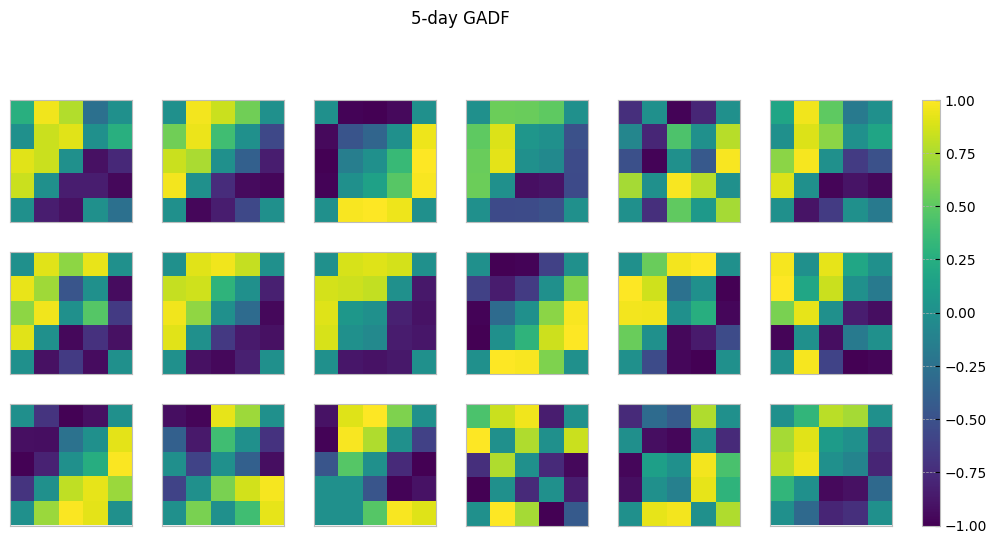

In [92]:
full_pictorch = torch.empty((0, input_dim, windows, windows))

for i in tqdm(range(x_train.shape[0]), position=0, leave=True):
    pictorch = torch.empty((0, windows, windows))
    for j in tqdm(range(input_dim), leave=False):
        data = x_train[i][:, j]
        gadf = GramianAngularField(image_size=windows, method='difference').fit_transform(data.numpy().reshape(1, -1))
        gadf = torch.from_numpy(gadf)
        pictorch = torch.cat([pictorch, gadf], dim=0)
    pictorch = pictorch.unsqueeze(0)
    full_pictorch = torch.cat([full_pictorch, pictorch], dim=0)

x_train_gadf = full_pictorch
y_train_gadf = y_train[:, -1, :]

full_pictorch = torch.empty((0, input_dim, windows, windows))

for i in tqdm(range(x_test.shape[0]), position=0, leave=True):
    pictorch = torch.empty((0, windows, windows))
    for j in tqdm(range(input_dim), leave=False):
        data = x_test[i][:, j]
        gadf = GramianAngularField(image_size=windows, method='difference').fit_transform(data.numpy().reshape(1, -1))
        gadf = torch.from_numpy(gadf)
        pictorch = torch.cat([pictorch, gadf], dim=0)
    pictorch = pictorch.unsqueeze(0)
    full_pictorch = torch.cat([full_pictorch, pictorch], dim=0)

x_test_gadf = full_pictorch
y_test_gadf = y_test[:, -1, :]

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(12, 6))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 6), axes_pad=0.3, share_all=True, cbar_mode='single')

for i, ax in enumerate(grid):
    im = ax.imshow(full_pictorch[0, i], origin='lower', vmin=-1., vmax=1.)
    
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
fig.suptitle("5-day GADF", y=1)
plt.show()

#### GASF Training

In [71]:
n_epochs = 100
batch_size = 10

x_train = x_train_gasf
y_train = y_train_gasf

model = Classifier().to(device)
trainer(x_train, y_train, model, device)

  2%|▏         | 2/100 [00:00<00:20,  4.71it/s]

Train | Epoch [001/100]: Loss: 0.68985, Accuracy: 0.54178
Train | Epoch [002/100]: Loss: 0.68402, Accuracy: 0.54209


  4%|▍         | 4/100 [00:00<00:15,  6.14it/s]

Train | Epoch [003/100]: Loss: 0.67875, Accuracy: 0.55280
Train | Epoch [004/100]: Loss: 0.67325, Accuracy: 0.56260


  6%|▌         | 6/100 [00:01<00:13,  6.73it/s]

Train | Epoch [005/100]: Loss: 0.66729, Accuracy: 0.59535
Train | Epoch [006/100]: Loss: 0.66091, Accuracy: 0.62137


  8%|▊         | 8/100 [00:01<00:12,  7.16it/s]

Train | Epoch [007/100]: Loss: 0.65412, Accuracy: 0.63055
Train | Epoch [008/100]: Loss: 0.64680, Accuracy: 0.65595


 10%|█         | 10/100 [00:01<00:12,  7.40it/s]

Train | Epoch [009/100]: Loss: 0.63900, Accuracy: 0.67034
Train | Epoch [010/100]: Loss: 0.63069, Accuracy: 0.67493


 12%|█▏        | 12/100 [00:01<00:11,  7.45it/s]

Train | Epoch [011/100]: Loss: 0.62192, Accuracy: 0.68748
Train | Epoch [012/100]: Loss: 0.61265, Accuracy: 0.69024


 14%|█▍        | 14/100 [00:02<00:11,  7.56it/s]

Train | Epoch [013/100]: Loss: 0.60287, Accuracy: 0.70738
Train | Epoch [014/100]: Loss: 0.59272, Accuracy: 0.70554


 16%|█▌        | 16/100 [00:02<00:11,  7.57it/s]

Train | Epoch [015/100]: Loss: 0.58231, Accuracy: 0.73676
Train | Epoch [016/100]: Loss: 0.57190, Accuracy: 0.72666


 18%|█▊        | 18/100 [00:02<00:10,  7.55it/s]

Train | Epoch [017/100]: Loss: 0.56139, Accuracy: 0.75390
Train | Epoch [018/100]: Loss: 0.55035, Accuracy: 0.74533


 20%|██        | 20/100 [00:02<00:10,  7.56it/s]

Train | Epoch [019/100]: Loss: 0.53866, Accuracy: 0.76492
Train | Epoch [020/100]: Loss: 0.52695, Accuracy: 0.77319


 22%|██▏       | 22/100 [00:03<00:10,  7.54it/s]

Train | Epoch [021/100]: Loss: 0.51521, Accuracy: 0.77594
Train | Epoch [022/100]: Loss: 0.50349, Accuracy: 0.79492


 24%|██▍       | 24/100 [00:03<00:10,  7.54it/s]

Train | Epoch [023/100]: Loss: 0.49125, Accuracy: 0.79400
Train | Epoch [024/100]: Loss: 0.47773, Accuracy: 0.81512


 26%|██▌       | 26/100 [00:03<00:09,  7.52it/s]

Train | Epoch [025/100]: Loss: 0.46403, Accuracy: 0.82308
Train | Epoch [026/100]: Loss: 0.45091, Accuracy: 0.82767


 28%|██▊       | 28/100 [00:03<00:09,  7.52it/s]

Train | Epoch [027/100]: Loss: 0.43836, Accuracy: 0.84910
Train | Epoch [028/100]: Loss: 0.42635, Accuracy: 0.84022


 30%|███       | 30/100 [00:04<00:09,  7.58it/s]

Train | Epoch [029/100]: Loss: 0.41278, Accuracy: 0.86532
Train | Epoch [030/100]: Loss: 0.39710, Accuracy: 0.86807


 32%|███▏      | 32/100 [00:04<00:08,  7.58it/s]

Train | Epoch [031/100]: Loss: 0.38317, Accuracy: 0.88277
Train | Epoch [032/100]: Loss: 0.37154, Accuracy: 0.89317


 34%|███▍      | 34/100 [00:04<00:08,  7.55it/s]

Train | Epoch [033/100]: Loss: 0.35943, Accuracy: 0.88583
Train | Epoch [034/100]: Loss: 0.34418, Accuracy: 0.90940


 36%|███▌      | 36/100 [00:04<00:08,  7.59it/s]

Train | Epoch [035/100]: Loss: 0.32840, Accuracy: 0.91552
Train | Epoch [036/100]: Loss: 0.31543, Accuracy: 0.92011


 38%|███▊      | 38/100 [00:05<00:08,  7.66it/s]

Train | Epoch [037/100]: Loss: 0.30414, Accuracy: 0.93205
Train | Epoch [038/100]: Loss: 0.29184, Accuracy: 0.92501


 40%|████      | 40/100 [00:05<00:07,  7.60it/s]

Train | Epoch [039/100]: Loss: 0.27653, Accuracy: 0.94276
Train | Epoch [040/100]: Loss: 0.26110, Accuracy: 0.94949


 42%|████▏     | 42/100 [00:05<00:07,  7.64it/s]

Train | Epoch [041/100]: Loss: 0.24877, Accuracy: 0.94949
Train | Epoch [042/100]: Loss: 0.23845, Accuracy: 0.95990


 44%|████▍     | 44/100 [00:06<00:07,  7.48it/s]

Train | Epoch [043/100]: Loss: 0.22729, Accuracy: 0.95347
Train | Epoch [044/100]: Loss: 0.21322, Accuracy: 0.97031


 46%|████▌     | 46/100 [00:06<00:07,  7.55it/s]

Train | Epoch [045/100]: Loss: 0.19881, Accuracy: 0.97153
Train | Epoch [046/100]: Loss: 0.18757, Accuracy: 0.97612


 48%|████▊     | 48/100 [00:06<00:06,  7.56it/s]

Train | Epoch [047/100]: Loss: 0.17859, Accuracy: 0.98133
Train | Epoch [048/100]: Loss: 0.16877, Accuracy: 0.98163


 50%|█████     | 50/100 [00:06<00:06,  7.57it/s]

Train | Epoch [049/100]: Loss: 0.15652, Accuracy: 0.98684
Train | Epoch [050/100]: Loss: 0.14436, Accuracy: 0.98959


 52%|█████▏    | 52/100 [00:07<00:06,  7.62it/s]

Train | Epoch [051/100]: Loss: 0.13518, Accuracy: 0.99174
Train | Epoch [052/100]: Loss: 0.12761, Accuracy: 0.99357


 54%|█████▍    | 54/100 [00:07<00:06,  7.64it/s]

Train | Epoch [053/100]: Loss: 0.11869, Accuracy: 0.99480
Train | Epoch [054/100]: Loss: 0.10844, Accuracy: 0.99633


 56%|█████▌    | 56/100 [00:07<00:05,  7.61it/s]

Train | Epoch [055/100]: Loss: 0.09979, Accuracy: 0.99755
Train | Epoch [056/100]: Loss: 0.09335, Accuracy: 0.99725


 58%|█████▊    | 58/100 [00:07<00:05,  7.67it/s]

Train | Epoch [057/100]: Loss: 0.08649, Accuracy: 0.99786
Train | Epoch [058/100]: Loss: 0.07854, Accuracy: 0.99816


 60%|██████    | 60/100 [00:08<00:05,  7.60it/s]

Train | Epoch [059/100]: Loss: 0.07196, Accuracy: 0.99878
Train | Epoch [060/100]: Loss: 0.06690, Accuracy: 0.99878


 62%|██████▏   | 62/100 [00:08<00:04,  7.60it/s]

Train | Epoch [061/100]: Loss: 0.06114, Accuracy: 1.00000
Train | Epoch [062/100]: Loss: 0.05545, Accuracy: 1.00000


 64%|██████▍   | 64/100 [00:08<00:04,  7.63it/s]

Train | Epoch [063/100]: Loss: 0.05129, Accuracy: 1.00000
Train | Epoch [064/100]: Loss: 0.04693, Accuracy: 1.00000


 66%|██████▌   | 66/100 [00:08<00:04,  7.64it/s]

Train | Epoch [065/100]: Loss: 0.04258, Accuracy: 1.00000
Train | Epoch [066/100]: Loss: 0.03935, Accuracy: 1.00000


 68%|██████▊   | 68/100 [00:09<00:04,  7.61it/s]

Train | Epoch [067/100]: Loss: 0.03582, Accuracy: 1.00000
Train | Epoch [068/100]: Loss: 0.03279, Accuracy: 1.00000


 70%|███████   | 70/100 [00:09<00:03,  7.62it/s]

Train | Epoch [069/100]: Loss: 0.03021, Accuracy: 1.00000
Train | Epoch [070/100]: Loss: 0.02751, Accuracy: 1.00000


 72%|███████▏  | 72/100 [00:09<00:03,  7.49it/s]

Train | Epoch [071/100]: Loss: 0.02547, Accuracy: 1.00000
Train | Epoch [072/100]: Loss: 0.02325, Accuracy: 1.00000


 74%|███████▍  | 74/100 [00:09<00:03,  7.50it/s]

Train | Epoch [073/100]: Loss: 0.02155, Accuracy: 1.00000
Train | Epoch [074/100]: Loss: 0.01977, Accuracy: 1.00000


 76%|███████▌  | 76/100 [00:10<00:03,  7.60it/s]

Train | Epoch [075/100]: Loss: 0.01835, Accuracy: 1.00000
Train | Epoch [076/100]: Loss: 0.01690, Accuracy: 1.00000


 78%|███████▊  | 78/100 [00:10<00:02,  7.58it/s]

Train | Epoch [077/100]: Loss: 0.01574, Accuracy: 1.00000
Train | Epoch [078/100]: Loss: 0.01455, Accuracy: 1.00000


 80%|████████  | 80/100 [00:10<00:02,  7.63it/s]

Train | Epoch [079/100]: Loss: 0.01360, Accuracy: 1.00000
Train | Epoch [080/100]: Loss: 0.01262, Accuracy: 1.00000


 82%|████████▏ | 82/100 [00:11<00:02,  7.58it/s]

Train | Epoch [081/100]: Loss: 0.01182, Accuracy: 1.00000
Train | Epoch [082/100]: Loss: 0.01104, Accuracy: 1.00000


 84%|████████▍ | 84/100 [00:11<00:02,  7.55it/s]

Train | Epoch [083/100]: Loss: 0.01035, Accuracy: 1.00000
Train | Epoch [084/100]: Loss: 0.00974, Accuracy: 1.00000


 86%|████████▌ | 86/100 [00:11<00:01,  7.58it/s]

Train | Epoch [085/100]: Loss: 0.00914, Accuracy: 1.00000
Train | Epoch [086/100]: Loss: 0.00864, Accuracy: 1.00000


 88%|████████▊ | 88/100 [00:11<00:01,  7.66it/s]

Train | Epoch [087/100]: Loss: 0.00814, Accuracy: 1.00000
Train | Epoch [088/100]: Loss: 0.00770, Accuracy: 1.00000


 90%|█████████ | 90/100 [00:12<00:01,  7.60it/s]

Train | Epoch [089/100]: Loss: 0.00731, Accuracy: 1.00000
Train | Epoch [090/100]: Loss: 0.00693, Accuracy: 1.00000


 92%|█████████▏| 92/100 [00:12<00:01,  7.58it/s]

Train | Epoch [091/100]: Loss: 0.00659, Accuracy: 1.00000
Train | Epoch [092/100]: Loss: 0.00628, Accuracy: 1.00000


 94%|█████████▍| 94/100 [00:12<00:00,  7.61it/s]

Train | Epoch [093/100]: Loss: 0.00599, Accuracy: 1.00000
Train | Epoch [094/100]: Loss: 0.00572, Accuracy: 1.00000


 96%|█████████▌| 96/100 [00:12<00:00,  7.56it/s]

Train | Epoch [095/100]: Loss: 0.00548, Accuracy: 1.00000
Train | Epoch [096/100]: Loss: 0.00524, Accuracy: 1.00000


 98%|█████████▊| 98/100 [00:13<00:00,  7.56it/s]

Train | Epoch [097/100]: Loss: 0.00503, Accuracy: 1.00000
Train | Epoch [098/100]: Loss: 0.00483, Accuracy: 1.00000


100%|██████████| 100/100 [00:13<00:00,  7.48it/s]

Train | Epoch [099/100]: Loss: 0.00464, Accuracy: 1.00000
Train | Epoch [100/100]: Loss: 0.00447, Accuracy: 1.00000


#### GADF Training

In [ ]:
n_epochs = 100
batch_size = 50

x_train = x_train_gadf
y_train = y_train_gadf

model = Classifier().to(device)
trainer(x_train, y_train, model, device)

#### Testing

In [108]:
x_test = x_test_gasf
y_test = y_test_gasf
# x_test = x_test_gadf
# y_test = y_test_gadf

model = Classifier().to(device)
acc, prediction = predict(x_test, y_test, model, device)

Test Accuracy: 0.516539454460144


#### Results

In [109]:
test = pd.read_csv('./spx_full_test.csv', index_col=0)
test.index = pd.to_datetime(test.index)
test['LABEL'] = (test.SPX.shift(-1) > test.SPX).astype(int)
pred_sig = (pd.Series(gasf_prediction) + pd.Series(gadf_prediction)).replace(1, np.nan).replace(2, 1)
pred_sig.index = test.index[windows:]
true_sig = test.LABEL[windows:]
(pred_sig == true_sig).sum() / pred_sig.notna().sum()

0.5528846153846154

In [110]:
pred_sig = pred_sig.dropna()
true_sig = true_sig.reindex(pred_sig.index)

In [111]:
confusion_matrix(true_sig, pred_sig, labels=[1, 0])

array([[79, 25],
       [68, 36]], dtype=int64)

0.5165394402035624


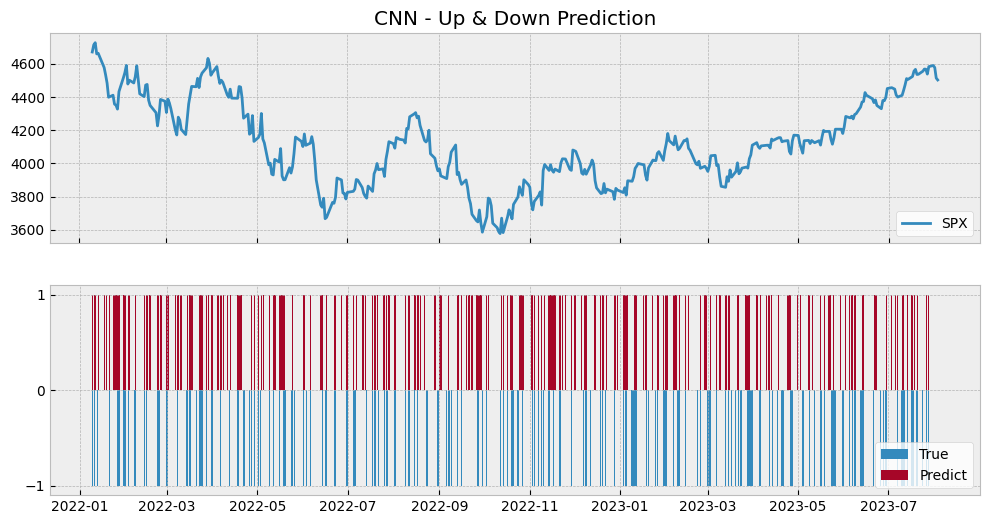

In [112]:
test = pd.read_csv('./spx_full_test.csv', index_col=0)
test.index = pd.to_datetime(test.index)
test['LABEL'] = (test.SPX.shift(-1) > test.SPX).astype(int)
pred_sig = pd.Series(prediction, index=test.index[windows:])
true_sig = test.LABEL[windows:]*-1

plt.style.use('bmh')
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(211)
ax1.plot(test.SPX[windows:], label='SPX')
ax1.legend(loc=4, frameon=True, facecolor='w')
ax1.set_title('CNN - Up & Down Prediction')
ax1.tick_params('x', labelbottom=False)

ax2 = plt.subplot(212)
ax2.bar(true_sig.index, true_sig, label='True')
ax2.bar(pred_sig.index, pred_sig, label='Predict')
ax2.legend(loc=4, frameon=True, facecolor='w')
ax2.set_yticks([-1, 0, 1])

test_acc = (pred_sig == true_sig*-1).sum() / len(pred_sig)
print(test_acc)

In [16]:
203/393

0.5165394402035624

In [13]:
(true_sig == -1).sum()

186

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_sig*-1, pred_sig, labels=[1, 0])

array([[114,  72],
       [118,  89]], dtype=int64)

#### Stop Loss Optimization

Text(0.5, 1.0, 'Stop Loss Optimization')

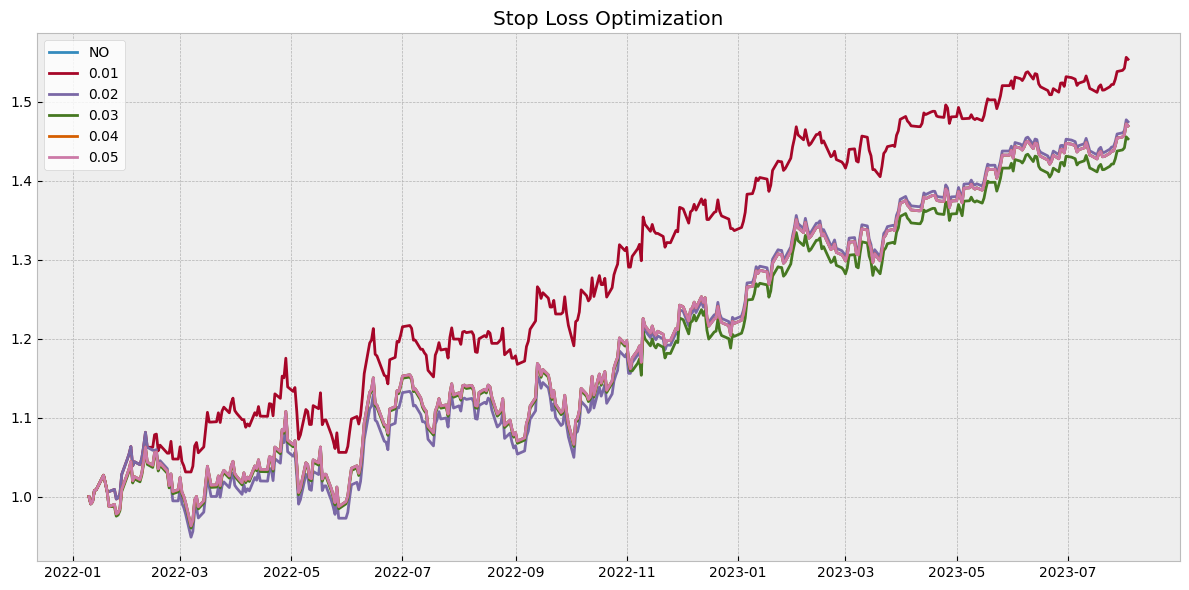

In [1217]:
spx = pd.read_csv('./2010_2023/SPX Index_target_modified.csv')
close = pd.Series(spx.Close.values, index=pd.to_datetime(spx.Date))
close = close.reindex(pred_sig.index)
position = pred_sig
position = position.replace(0, -1).fillna(0)
payoff = close.diff(1) / close.shift(1)
payoff = (position.shift(1) * payoff).fillna(0)
equity = payoff.cumsum() + 1
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.plot(equity, label='NO')

stop_loss = [0.01, 0.02, 0.03, 0.04, 0.05]

for s in stop_loss:
    position = pred_sig
    position = position.replace(0, -1).fillna(0)
    entry_price = close[0]
    for i in range(1, position.shape[0]):
        if (position.iloc[i] == position.iloc[i-1]) & (position.iloc[i] == 1):
            temp = close[i] / entry_price 
            if temp < 1 - s:
                position.iloc[i] = 0
        elif (position.iloc[i] == position.iloc[i-1]) & (position.iloc[i] == -1):
            temp = close[i] / entry_price 
            if temp > 1 + s:
                position.iloc[i] = 0
        else:
            entry_price = close[i]

    payoff = close.diff(1) / close.shift(1)
    payoff = (position.shift(1) * payoff).fillna(0)
    equity = payoff.cumsum() + 1
    plt.plot(equity, label=str(s))

plt.legend(loc=2, frameon=True, facecolor='w')
plt.title('Stop Loss Optimization')

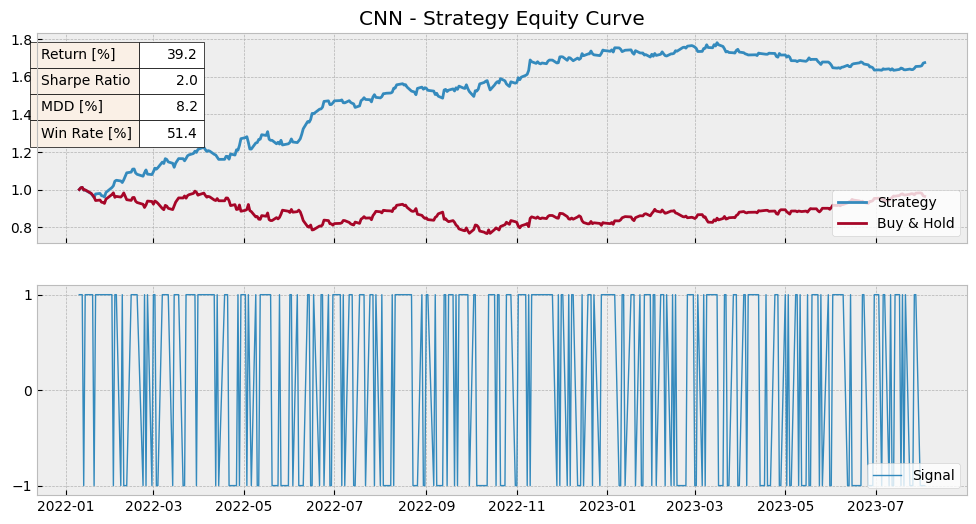

In [115]:
spx = pd.read_csv('./2010_2023/SPX Index_target_modified.csv')
close = pd.Series(spx.Close.values, index=pd.to_datetime(spx.Date))
close = close.reindex(pred_sig.index)
position = pred_sig
position = position.replace(0, -1).fillna(0)
stop_loss = 0.03

entry_price = close[0]
for i in range(1, position.shape[0]):
    if (position.iloc[i] == position.iloc[i-1]) & (position.iloc[i] == 1):
        temp = close[i] / entry_price 
        if temp < 1 - stop_loss:
            position.iloc[i] = 0
    elif (position.iloc[i] == position.iloc[i-1]) & (position.iloc[i] == -1):
        temp = close[i] / entry_price 
        if temp > 1 + stop_loss:
            position.iloc[i] = 0
    else:
        entry_price = close[i]

payoff = close.diff(1) / close.shift(1)
payoff = (position.shift(1) * payoff).fillna(0)
equity = payoff.cumsum() + 1
spx_payoff = (close.diff(1) / close[0]).fillna(0)
spx_equity = spx_payoff.cumsum() + 1

period = len(payoff.index)
totalRet = equity[-1] - 1
ret = (1+totalRet)**(252/period) - 1 if totalRet > -1 else -((1-totalRet)**(252/period) - 1)
vol = payoff.std() * np.sqrt(252)
mdd = abs((equity / equity.cummax() - 1).min())
winRate = len([i for i in payoff if i > 0]) / len(payoff)
sharpe = (payoff.mean() * 252 - 0.015) / vol

plt.style.use('bmh')
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(211)
ax1.plot(equity, label='Strategy')
ax1.plot(spx_equity, label='Buy & Hold')
ax1.legend(loc=4, frameon=True, facecolor='w')
ax1.set_title('CNN - Strategy Equity Curve')
ax1.tick_params('x', labelbottom=False)
ax1.table(
    cellText=[[np.round(ret*100, 1)], [np.round(sharpe, 1)], [np.round(mdd*100, 1)], [np.round(winRate*100, 1)]], 
    rowLabels=['Return [%]', 'Sharpe Ratio', 'MDD [%]', 'Win Rate [%]'], 
    rowColours=np.full(4, 'linen'),
    loc='center',
    bbox=[0.11, 0.46, 0.07, 0.5],
    zorder=2
)

ax2 = plt.subplot(212)
ax2.plot(position, label='Signal', lw=1)
ax2.legend(loc=4, frameon=True, facecolor='w')
ax2.set_yticks([-1, 0, 1])